Exploratory Data analysis on Haberman dataset of cancer survival

In [4]:
#importing all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import os
os.chdir('/home/ylnhari/Documents/AppliedAicourse/ipython_notes_docs/csv files')
os.getcwd()

'/home/ylnhari/Documents/AppliedAicourse/ipython_notes_docs/csv files'

In [11]:
import warnings
warnings.filterwarnings("ignore")


In [12]:
# reading the data set into a pandas data frame 
haberman = pd.read_csv('haberman.csv')

In [13]:
#high level analysis on data set
# data points and features
print(haberman.shape)


(305, 4)


In [14]:
#column names or what are the features available in the data set for each data point 
haberman.columns = ["Age", "Year of operation", "axillary nodes", "Survival status"]
print(haberman.columns)

Index(['Age', 'Year of operation', 'axillary nodes', 'Survival status'], dtype='object')


In [15]:
#(Q) How many data points for each class are present? #(or) How many flowers for each species are present?

haberman["Survival status"].value_counts()


1    224
2     81
Name: Survival status, dtype: int64

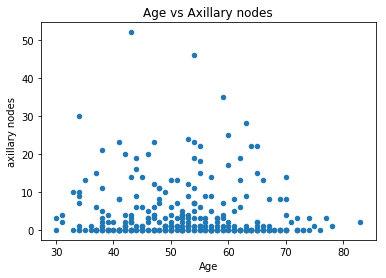

In [22]:
#2-d scatter plot
# x-axis represents age and  y-axis represents axillary nodes --> these attributes have a major share on survival status
haberman.plot(kind='scatter', x='Age', y='axillary nodes') ;
plt.title('Age vs Axillary nodes');
plt.show()

OBSERVATIONS:
    no matter what the age is the no of auxillary point for most of the patients are in between 0 to 10

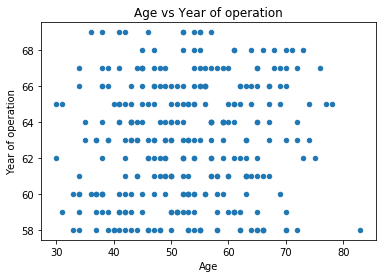

In [28]:
#2-d scatter plot between age and year of operation
haberman.plot(kind='scatter', x='Age', y='Year of operation') ;
plt.title('Age vs Year of operation');
plt.show()

OBSERVATIONS:
    here all the data points are distributed uniformly across year of operation

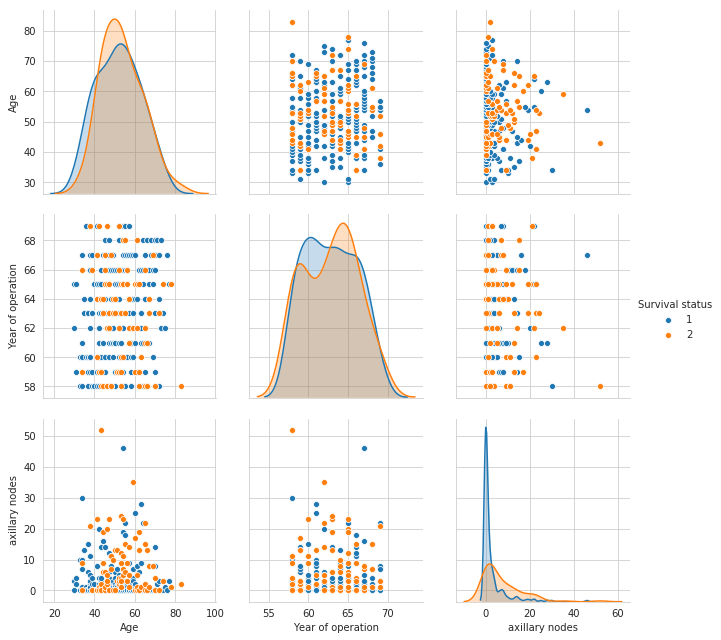

In [31]:
#Pair Plots
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="Survival status",height=3,vars=["Age","Year of operation","axillary nodes"]);
plt.show()

# UNIVARIATE ANALYSIS ON HABERMAN DATASET


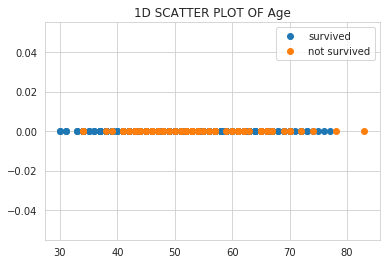

In [37]:
#1-d scatter plot using Age
import numpy as np
haberman_survival = haberman.loc[haberman["Survival status"] == 1];
haberman_non_survival = haberman.loc[haberman["Survival status"] == 2];

plt.plot(haberman_survival["Age"], np.zeros_like(haberman_survival['Age']), 'o',label='survived')

plt.plot(haberman_non_survival["Age"], np.zeros_like(haberman_non_survival['Age']), 'o',label='not survived')
plt.title('1D SCATTER PLOT OF Age');
plt.legend();
plt.show()

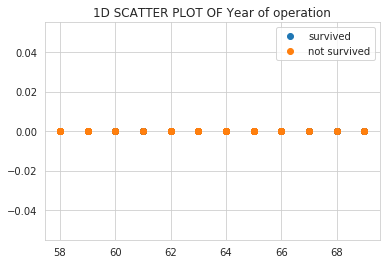

In [38]:
#1-d scatter plot for Year of operation
plt.plot(haberman_survival["Year of operation"], np.zeros_like(haberman_survival['Year of operation']), 'o',label='survived')
plt.plot(haberman_non_survival["Year of operation"], np.zeros_like(haberman_non_survival['Year of operation']), 'o',label='not survived')
plt.title('1D SCATTER PLOT OF Year of operation');
plt.legend();
plt.show()

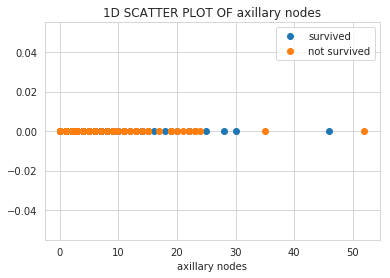

In [46]:
#1-d scatter plot for axillary nodes
plt.plot(haberman_survival["axillary nodes"], np.zeros_like(haberman_survival['axillary nodes']), 'o',label='survived')
plt.plot(haberman_non_survival["axillary nodes"], np.zeros_like(haberman_non_survival['axillary nodes']), 'o',label='not survived')
plt.title('1D SCATTER PLOT OF axillary nodes');
plt.legend();
plt.xlabel('axillary nodes');
plt.show()

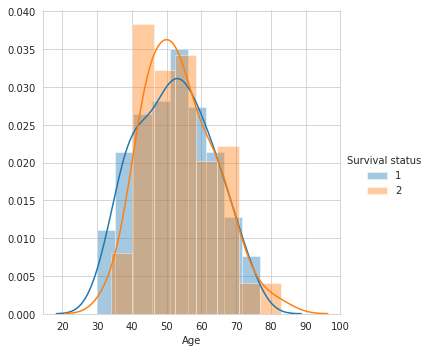

In [40]:
#histograpm and pdf for Age
sns.FacetGrid(haberman, hue="Survival status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

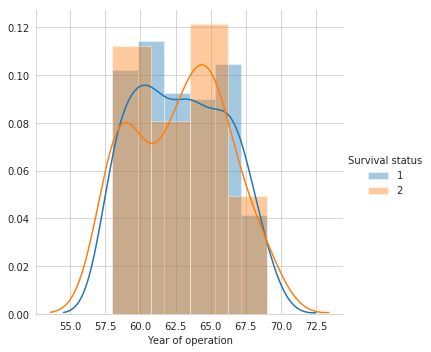

In [41]:
#histograpm and pdf for Year of operation
sns.FacetGrid(haberman, hue="Survival status", height=5) \
   .map(sns.distplot, "Year of operation") \
   .add_legend();
plt.show();

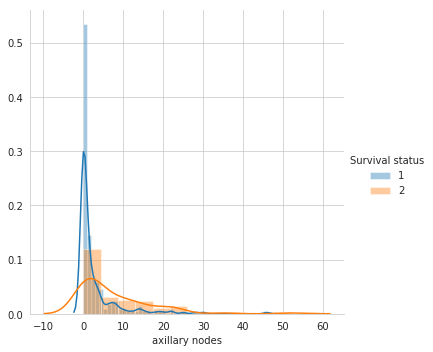

In [42]:
#histograpm and pdf for Age
sns.FacetGrid(haberman, hue="Survival status", height=5) \
   .map(sns.distplot, "axillary nodes") \
   .add_legend();
plt.show();

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


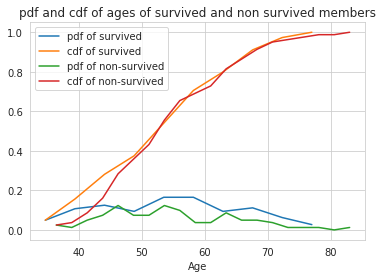

In [53]:
#we see cdf for them now
counts, bin_edges = np.histogram(haberman_survival['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of survived');
plt.plot(bin_edges[1:],cdf,label='cdf of survived')


counts, bin_edges = np.histogram(haberman_non_survival['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of non-survived');
plt.plot(bin_edges[1:],cdf,label='cdf of non-survived')
plt.title('pdf and cdf of ages of survived and non survived members')
plt.xlabel('Age')
plt.legend()

plt.show();

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


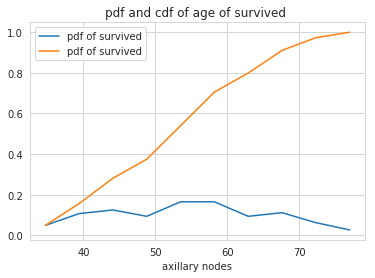

In [54]:
#CDF FOR AGE
counts, bin_edges = np.histogram(haberman_survival['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of survived')
plt.plot(bin_edges[1:],cdf,label='pdf of survived')

plt.title('pdf and cdf of age of survived ')
plt.legend();
plt.xlabel('axillary nodes');

plt.show();

No handles with labels found to put in legend.


[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


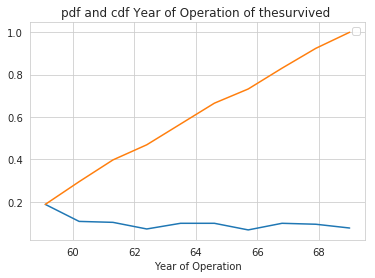

In [55]:
#CDF FOR year of operation
counts, bin_edges = np.histogram(haberman_survival['Year of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('pdf and cdf Year of Operation of thesurvived ')
plt.legend();
plt.xlabel('Year of Operation');


plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


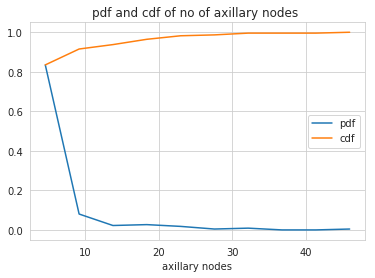

In [56]:
#CDF FOR axillary nodes 
counts, bin_edges = np.histogram(haberman_survival['axillary nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title('pdf and cdf of no of axillary nodes ')
plt.legend();
plt.xlabel('axillary nodes');


plt.show();

OBSERVATIONS:
    1.we can look from the graph that when no of axillary nodes increased  no of people survived also decreased
    most survivng people have auxillary nodes less than 5, by more than 80% of the people the people survived 
    if auxillary nodes are less than 10(not taking non-survival statistics in account).
    2.from age and year of operations we cannot access anything since the graph is almost uniform.
    

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


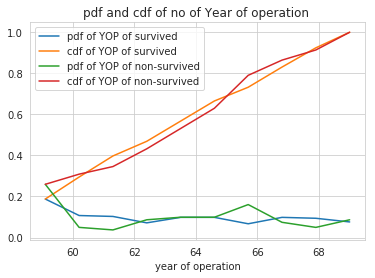

In [57]:
#looking both cdf's in one graph
#we see cdf for them now
counts, bin_edges = np.histogram(haberman_survival['Year of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of YOP of survived');
plt.plot(bin_edges[1:], cdf,label='cdf of YOP of survived')


counts, bin_edges = np.histogram(haberman_non_survival['Year of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of YOP of non-survived');
plt.plot(bin_edges[1:], cdf,label='cdf of YOP of non-survived')
plt.title('pdf and cdf of no of Year of operation ')
plt.legend();
plt.xlabel('year of operation');
plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


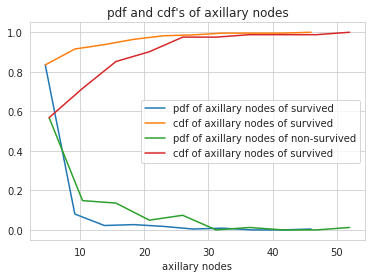

In [59]:
#cdf for axillary nodes
counts, bin_edges = np.histogram(haberman_survival['axillary nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of axillary nodes of survived');
plt.plot(bin_edges[1:], cdf,label='cdf of axillary nodes of survived')


counts, bin_edges = np.histogram(haberman_non_survival['axillary nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of axillary nodes of non-survived');
plt.plot(bin_edges[1:], cdf,label='cdf of axillary nodes of survived')
plt.xlabel("axillary nodes")
plt.title("pdf and cdf's of axillary nodes")
plt.legend()

plt.show();

In [26]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("mean of age")
print(np.mean(haberman_survival["Age"]))
print("mean of year of operation")
print(np.mean(haberman_survival["Year of operation"]))
print("mean of axillary nodes")
print(np.mean(haberman_survival["axillary nodes"]))

print("\nStd-dev:");
print("age")
print(np.std(haberman_survival["Age"]))
print("year of operation")
print(np.std(haberman_survival["Year of operation"]))
print("axillary nodes")
print(np.std(haberman_survival["axillary nodes"]))



Means:
mean of age
52.11607142857143
mean of year of operation
62.857142857142854
mean of axillary nodes
2.799107142857143

Std-dev:
age
10.913004640364278
year of operation
3.222014517506153
axillary nodes
5.869092706952764


In [27]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("mean of age")
print(np.mean(haberman_non_survival["Age"]))
print("mean of year of operation")
print(np.mean(haberman_non_survival["Year of operation"]))
print("mean of axillary nodes")
print(np.mean(haberman_non_survival["axillary nodes"]))

print("\nStd-dev:");
print("age")
print(np.std(haberman_non_survival["Age"]))
print("year of operation")
print(np.std(haberman_non_survival["Year of operation"]))
print("axillary nodes")
print(np.std(haberman_non_survival["axillary nodes"]))



Means:
mean of age
53.67901234567901
mean of year of operation
62.82716049382716
mean of axillary nodes
7.45679012345679

Std-dev:
age
10.104182193031312
year of operation
3.3214236255207887
axillary nodes
9.128776076761635


In [31]:
#Median, Quantiles, Percentiles, IQR.
print("SURVIVED MEMBERS")
print("\nMedians:")
print(np.median(haberman_survival["Age"]))
print(np.median(haberman_survival["Year of operation"]))
print(np.median(haberman_survival["axillary nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_survival["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_survival["Year of operation"],np.arange(0, 100, 25)))
print(np.percentile(haberman_survival["axillary nodes"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_survival["Age"],90))
print(np.percentile(haberman_survival["Year of operation"],90))
print(np.percentile(haberman_survival["axillary nodes"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survival["Age"]))
print(robust.mad(haberman_survival["Year of operation"]))
print(robust.mad(haberman_survival["axillary nodes"]))

SURVIVED MEMBERS

Medians:
52.0
63.0
0.0

Quantiles:
[30. 43. 52. 60.]
[58. 60. 63. 66.]
[0. 0. 0. 3.]

90th Percentiles:
67.0
67.0
8.0

Median Absolute Deviation
13.343419966550417
4.447806655516806
0.0


In [32]:
#Median, Quantiles, Percentiles, IQR.
print("SURVIVED MEMBERS")
print("\nMedians:")
print(np.median(haberman_non_survival["Age"]))
print(np.median(haberman_non_survival["Year of operation"]))
print(np.median(haberman_non_survival["axillary nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_non_survival["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_non_survival["Year of operation"],np.arange(0, 100, 25)))
print(np.percentile(haberman_non_survival["axillary nodes"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_non_survival["Age"],90))
print(np.percentile(haberman_non_survival["Year of operation"],90))
print(np.percentile(haberman_non_survival["axillary nodes"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_non_survival["Age"]))
print(robust.mad(haberman_non_survival["Year of operation"]))
print(robust.mad(haberman_non_survival["axillary nodes"]))

SURVIVED MEMBERS

Medians:
53.0
63.0
4.0

Quantiles:
[34. 46. 53. 61.]
[58. 59. 63. 65.]
[ 0.  1.  4. 11.]

90th Percentiles:
67.0
67.0
20.0

Median Absolute Deviation
11.860817748044816
4.447806655516806
5.930408874022408


OBSERVATIONS:
    here age and year of operation almost have same result for both surviaval and non-survival members
    but members with axillary nodes closer to 0 and and less than 8 are most likely to survive and if axillary nodes
    moves away from the median,chances of surviving reduces for the person abd by looking at the 90th percentile values
    90% of surviving members have axillary nodes less than 8.

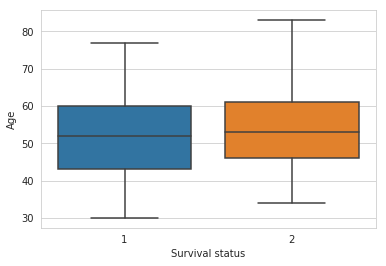

In [65]:
sns.boxplot(x='Survival status',y='Age', data=haberman)
plt.show()

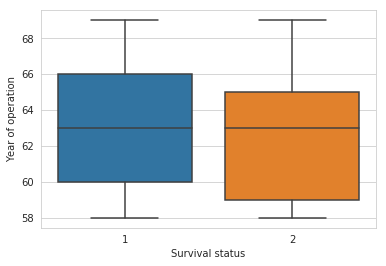

In [66]:
sns.boxplot(x='Survival status',y='Year of operation', data=haberman)
plt.show()

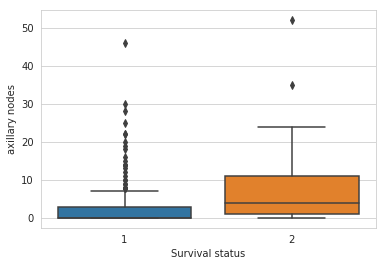

In [67]:
sns.boxplot(x='Survival status',y='axillary nodes', data=haberman)
plt.show()

OBSERVATIONS:
    here patients who survived have less no(between 0 to 5) of auxillary nodes  and with auxillary nodes 
    greater than 1 and less than 20 are most likely to not survive.

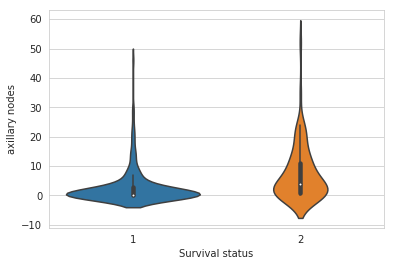

In [68]:
sns.violinplot(x="Survival status", y="axillary nodes", data=haberman, size=8)
plt.show()

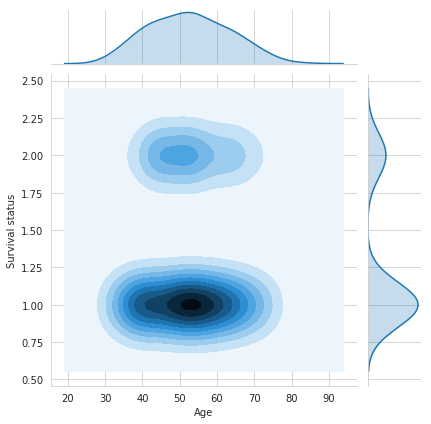

In [69]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="Survival status", data=haberman, kind="kde");
plt.show();